In [1]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import graphviz

In [2]:
irisset = datasets.load_iris()
X=irisset.data
Y=irisset.target

In [3]:
df= sns.load_dataset('iris')
X=df.iloc[:,0:4].values
Y=df.iloc[:,4]

In [4]:
cf=DecisionTreeClassifier() #random_state=1234 
cf.fit(X,Y)
Ypred= cf.predict(X)
cmat = confusion_matrix(Y,Ypred)

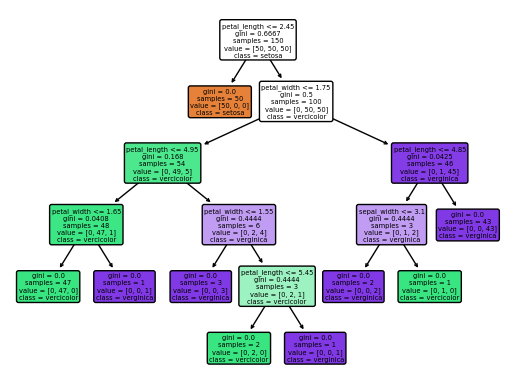

In [5]:
decPlot= plot_tree(decision_tree=cf,feature_names=["sepal_length","sepal_width","petal_length","petal_width"],
                   class_names=["setosa","vercicolor","verginica"],
                   filled = True ,precision=4,rounded=True
                   )

In [6]:
text_representaion=tree.export_text(cf,feature_names=["sepal_length","sepal_width","petal_length","petal_width"])
print(text_representaion)

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- petal_width <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_width >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- petal_length >  4.95
|   |   |   |--- petal_width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- petal_width >  1.55
|   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |--- class: virginica
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- sepal_width <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal_width >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- petal_length >  4.85
|   |   |   |--- class: virginica



In [7]:
dot_data = tree.export_graphviz(cf, out_file=None, 
                      feature_names = ["sepal_length","sepal_width","petal_length","petal_width"],  
                      class_names =["setosa", "vercicolor", "verginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 

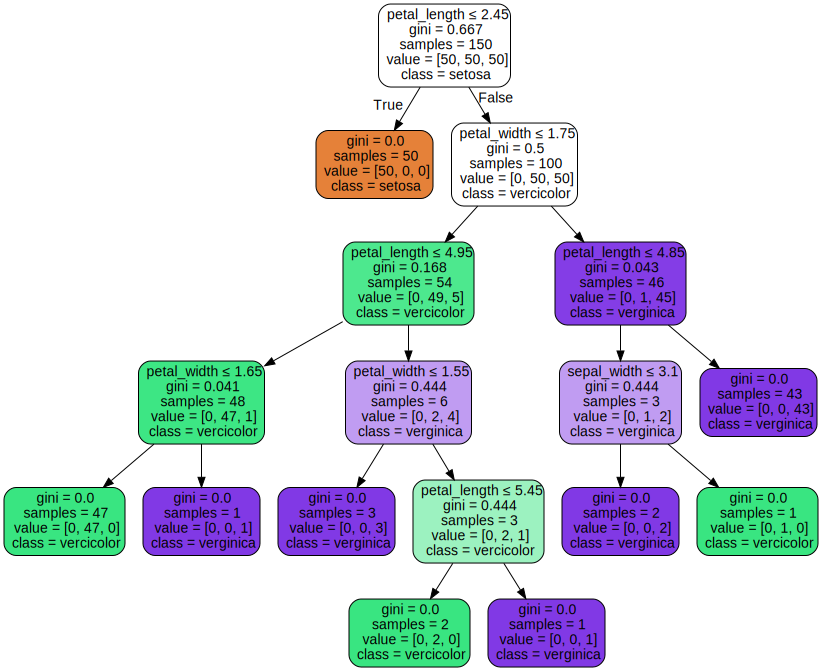

In [8]:
graph